# ANALYSE DES DONNÉES

In [31]:
import pickle
import math
import numpy as np
import os
import sklearn
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from collections import Counter
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from collections import Counter
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

###############################################################################


with open("/Users/amelle/Desktop/Sogeti/gen-one/fd_data_gen_one_s11.pickle", "rb") as f:
    data_s11 = pickle.load(f)

with open("/Users/amelle/Desktop/Sogeti/gen-one/metadata_gen_one.pickle", "rb") as f:
    metadata = pickle.load(f)




with open("/Users/amelle/Desktop/Sogeti/datasets/gen-one/clean/fd_data_gen_one_s11.pickle", "rb") as f:
    fd_data = pickle.load(f)

with open("/Users/amelle/Desktop/Sogeti/datasets/gen-one/clean/metadata_gen_one.pickle", "rb") as f:
    metadata_data = pickle.load(f)
    
    

with open("/Users/amelle/Desktop/Sogeti/datasets/gen-one/clean/train_data.pickle", "rb") as f:
    train_data = pickle.load(f)

with open("/Users/amelle/Desktop/Sogeti/datasets/gen-one/clean/train_labels.pickle", "rb") as f:
    train_labels = pickle.load(f)

with open("/Users/amelle/Desktop/Sogeti/datasets/gen-one/clean/train_md.pickle", "rb") as f:
    train_md = pickle.load(f)
    


with open("/Users/amelle/Desktop/Sogeti/datasets/gen-one/clean/test_data.pickle", "rb") as f:
    test_data = pickle.load(f)

with open("/Users/amelle/Desktop/Sogeti/datasets/gen-one/clean/test_labels.pickle", "rb") as f:
    test_labels = pickle.load(f)

with open("/Users/amelle/Desktop/Sogeti/datasets/gen-one/clean/test_md.pickle", "rb") as f:
    test_md = pickle.load(f)


In [33]:
print (test_labels.shape)
print (train_labels.shape)

(50,)
(199,)


<style>
    div.output_scroll {
        height: 400px;  /* Définit une hauteur fixe avec une barre de défilement */
        overflow-y: scroll;
    }
</style>

#### Chargement du dataset principal et exploration des données et des métadonnées

In [5]:
print(fd_data)

[[[ 0.77276859+0.60698369j  0.77286743+0.60692611j
    0.77286839+0.60683238j ...  0.77233386+0.60739237j
    0.77253262+0.60728794j  0.77273545+0.60718263j]
  [ 0.78432414+0.59168948j  0.7844515 +0.59163127j
    0.78442235+0.59157939j ...  0.78395586+0.5921893j
    0.7841345 +0.59207824j  0.7843103 +0.59192498j]
  [ 0.79525368+0.57617232j  0.79535535+0.57612365j
    0.79533053+0.57604345j ...  0.79492659+0.57677655j
    0.79509979+0.57659964j  0.79522991+0.57644758j]
  ...
  [-0.08254912+0.24635747j -0.08540133+0.24947416j
   -0.08362449+0.24960577j ... -0.08371444+0.25233713j
   -0.08132568+0.24992455j -0.08178679+0.24718514j]
  [-0.07975056+0.24808725j -0.08233818+0.25152835j
   -0.08042578+0.2514465j  ... -0.08030329+0.25421239j
   -0.07813598+0.25170557j -0.07872076+0.24913079j]
  [-0.07676874+0.24976993j -0.07904621+0.25345226j
   -0.07714552+0.2532364j  ... -0.07687031+0.25602756j
   -0.07485886+0.25337649j -0.07545079+0.25093989j]]

 [[ 0.77298746+0.60728702j  0.7729675 +0.6071

In [6]:
print(fd_data.shape)

(323, 1001, 72)


In [7]:
for i, entry in enumerate(metadata_data[:8]):  
    print(f"--- Metadata {i} ---")
    for key, value in entry.items():
        print(f"{key}: {value}")
    print()

--- Metadata 0 ---
n_expt: 1
id: 1
phant_id: A2F1
tum_rad: 3.0
tum_shape: sphere
tum_x: 3.0
tum_y: -3.0
tum_z: nan
birads: 1
adi_ref_id: 6
emp_ref_id: 12
date: 2018-02-28
n_session: 1
ant_rad: 21.0
ant_z: nan
fib_ang: nan
adi_x: nan
adi_y: nan
fib_ref_id: 5
fib_x: nan
fib_y: nan
tum_in_fib: 

--- Metadata 1 ---
n_expt: 2
id: 2
phant_id: A2F1
tum_rad: 2.0
tum_shape: sphere
tum_x: 3.0
tum_y: -3.0
tum_z: nan
birads: 1
adi_ref_id: 6
emp_ref_id: 12
date: 2018-02-28
n_session: 1
ant_rad: 21.0
ant_z: nan
fib_ang: nan
adi_x: nan
adi_y: nan
fib_ref_id: 5
fib_x: nan
fib_y: nan
tum_in_fib: 

--- Metadata 2 ---
n_expt: 3
id: 3
phant_id: A2F1
tum_rad: 2.0
tum_shape: spiculated
tum_x: 3.0
tum_y: -3.0
tum_z: nan
birads: 1
adi_ref_id: 6
emp_ref_id: 12
date: 2018-02-28
n_session: 1
ant_rad: 21.0
ant_z: nan
fib_ang: nan
adi_x: nan
adi_y: nan
fib_ref_id: 5
fib_x: nan
fib_y: nan
tum_in_fib: 

--- Metadata 3 ---
n_expt: 4
id: 4
phant_id: A2F1
tum_rad: 1.0
tum_shape: sphere
tum_x: 3.0
tum_y: -3.0
tum_z: nan

In [10]:
for i, entry in enumerate(train_md[:3]):  
    print(f"--- Metadata {i} ---")
    for key, value in entry.items():
        print(f"{key}: {value}")
    print()

--- Metadata 0 ---
n_expt: 3
id: 130
phant_id: A1F4
tum_rad: 2.0
tum_shape: spiculated
tum_x: 1.5
tum_y: -3.0
tum_z: nan
birads: 4
adi_ref_id: 133
emp_ref_id: 134
date: 2018-03-04
n_session: 10
ant_rad: 20.0
ant_z: nan
fib_ang: nan
adi_x: nan
adi_y: nan
fib_ref_id: 132
fib_x: nan
fib_y: nan
tum_in_fib: 

--- Metadata 1 ---
n_expt: 9
id: 71
phant_id: A3F3
tum_rad: 2.0
tum_shape: sphere
tum_x: -2.25
tum_y: 0.75
tum_z: nan
birads: 2
adi_ref_id: 74
emp_ref_id: 69
date: 2019-06-12
n_session: 6
ant_rad: 21.9
ant_z: nan
fib_ang: nan
adi_x: nan
adi_y: nan
fib_ref_id: nan
fib_x: nan
fib_y: nan
tum_in_fib: 

--- Metadata 2 ---
n_expt: 1
id: 276
phant_id: A2F5
tum_rad: 1.0
tum_shape: sphere
tum_x: 0.75
tum_y: -4.0
tum_z: nan
birads: 4
adi_ref_id: 282
emp_ref_id: 283
date: 2019-03-19
n_session: 26
ant_rad: 21.5
ant_z: nan
fib_ang: nan
adi_x: nan
adi_y: nan
fib_ref_id: nan
fib_x: nan
fib_y: nan
tum_in_fib: 



In [15]:
for i, entry in enumerate(test_md[:8]):  
    print(f"--- Metadata {i} ---")
    for key, value in entry.items():
        print(f"{key}: {value}")
    print()

--- Metadata 0 ---
n_expt: 7
id: 110
phant_id: A1F1
tum_rad: 3.0
tum_shape: sphere
tum_x: nan
tum_y: nan
tum_z: nan
birads: 2
adi_ref_id: 114
emp_ref_id: 115
date: 2018-03-02
n_session: 8
ant_rad: 20.0
ant_z: nan
fib_ang: nan
adi_x: nan
adi_y: nan
fib_ref_id: nan
fib_x: nan
fib_y: nan
tum_in_fib: 

--- Metadata 1 ---
n_expt: 9
id: 143
phant_id: A3F1
tum_rad: 2.0
tum_shape: spiculated
tum_x: -0.5
tum_y: 1.25
tum_z: nan
birads: 1
adi_ref_id: 145
emp_ref_id: 146
date: 2018-03-13
n_session: 11
ant_rad: 21.0
ant_z: nan
fib_ang: nan
adi_x: nan
adi_y: nan
fib_ref_id: nan
fib_x: nan
fib_y: nan
tum_in_fib: 

--- Metadata 2 ---
n_expt: 1
id: 104
phant_id: A1F1
tum_rad: 3.0
tum_shape: sphere
tum_x: 2.5
tum_y: -3.0
tum_z: nan
birads: 2
adi_ref_id: 109
emp_ref_id: 115
date: 2018-03-02
n_session: 8
ant_rad: 20.0
ant_z: nan
fib_ang: nan
adi_x: nan
adi_y: nan
fib_ref_id: 108
fib_x: nan
fib_y: nan
tum_in_fib: 

--- Metadata 3 ---
n_expt: 10
id: 156
phant_id: A3F3
tum_rad: 1.0
tum_shape: sphere
tum_x: -

In [17]:
visualisation_labels = []
for entry in metadata_data:
    rad = entry.get('tum_rad', float('nan'))
    if math.isnan(rad):
        visualisation_labels.append(0)  # pas de tumeur
    else:
        visualisation_labels.append(1)  # tumeur

print("Labels :", visualisation_labels[:323]) 

Labels : [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0]


In [19]:
count_tum = 0    # tum_rad > 0
count_no_tum = 0 # tum_rad = 0
count_nan = 0    # tum_rad = NaN

for entry in metadata:
    rad = entry.get('tum_rad', float('nan'))
    
    if math.isnan(rad):
        count_nan += 1
    elif rad > 0:
        count_tum += 1
    else:
        count_no_tum += 1

print("Nombre de scans avec tum_rad > 0  :", count_tum)
print("Nombre de scans avec tum_rad = 0  :", count_no_tum)
print("Nombre de scans avec tum_rad = NaN:", count_nan)

Nombre de scans avec tum_rad > 0  : 124
Nombre de scans avec tum_rad = 0  : 0
Nombre de scans avec tum_rad = NaN: 199


# DÉBUT DU MACHINE LEARNING

## Decision Tree

In [23]:
import logging
import sys

def get_notebook_logger(name="notebook_logger", level=logging.DEBUG):
    """
    Initialise un logger compatible avec Jupyter Notebook.
    
    Parameters
    ----------
    name : str
        Nom du logger.
    level : int
        Niveau de logging (DEBUG, INFO, WARNING, ERROR, CRITICAL).
    
    Returns
    -------
    logger : logging.Logger
        Logger configuré.
    """
    
    logger = logging.getLogger(name)

    if logger.hasHandlers():
        logger.handlers.clear()

    logger.setLevel(level)

    log_format = logging.Formatter("[%(asctime)s][%(levelname)s] %(message)s")

    stdout_handler = logging.StreamHandler(sys.stdout)
    stdout_handler.setFormatter(log_format)

    logger.addHandler(stdout_handler)

    return logger
    
logger = get_notebook_logger()
logger.info("Logger pour Jupyter Notebook initialisé avec succès.")


[2025-03-16 23:50:51,598][INFO] Logger pour Jupyter Notebook initialisé avec succès.


In [25]:
def normalize_samples(data):
    """Normalizes each sample in data to have unity maximum

    Parameters
    ----------
    data : array_like
        3D array of the features for each sample (assumes 2D features)

    Returns
    -------
    normalized_data : array_like
        Array of the features for each sample, normalized so that the
        max value is unity for each sample
    """

    # Assert that data must be 3D
    assert len(np.shape(data)) == 3, 'Error: data must have 3 dim'

    normalized_data = np.ones_like(data)  # Init array to return

    # For each sample
    for sample_idx in range(np.size(data, axis=0)):

        # Normalize to have max of unity
        normalized_data[sample_idx, :, :] = (data[sample_idx, :, :] /
                                             np.max(data[sample_idx, :, :]))

    return normalized_data


[2025-03-16 12:19:45,251][INFO] 	BEGINNING...
[2025-03-16 12:19:45,252][INFO] 	Max Iter: 1000000000	Learn Rate: 1.000
[2025-03-16 12:19:45,265][INFO] --- RUN 1 / 100 ---
[2025-03-16 12:19:45,266][INFO] 	Lancement du GridSearchCV sur ce RUN...
[2025-03-16 12:19:52,187][INFO] 	Meilleurs paramètres RUN 1: {'bootstrap': False, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 100}
[2025-03-16 12:19:52,189][INFO] 	Train Data:
[2025-03-16 12:19:52,256][INFO] 	best threshold:	0.473
[2025-03-16 12:19:52,261][INFO] 		Acc:	0.960
[2025-03-16 12:19:52,261][INFO] 		ROC:	0.994
[2025-03-16 12:19:52,262][INFO] 		Sens:	0.990
[2025-03-16 12:19:52,263][INFO] 		Spec:	0.930
[2025-03-16 12:19:52,263][INFO] 	Test Data:
[2025-03-16 12:19:52,277][INFO] 	best threshold:	0.473
[2025-03-16 12:19:52,279][INFO] 		Acc:	0.840
[2025-03-16 12:19:52,280][INFO] 		ROC:	0.870
[2025-03-16 12:19:52,280][INFO] 		Sens:	0.920
[2025-03-16 12:19:52,281][INFO] 		Spec:	0.760
[20

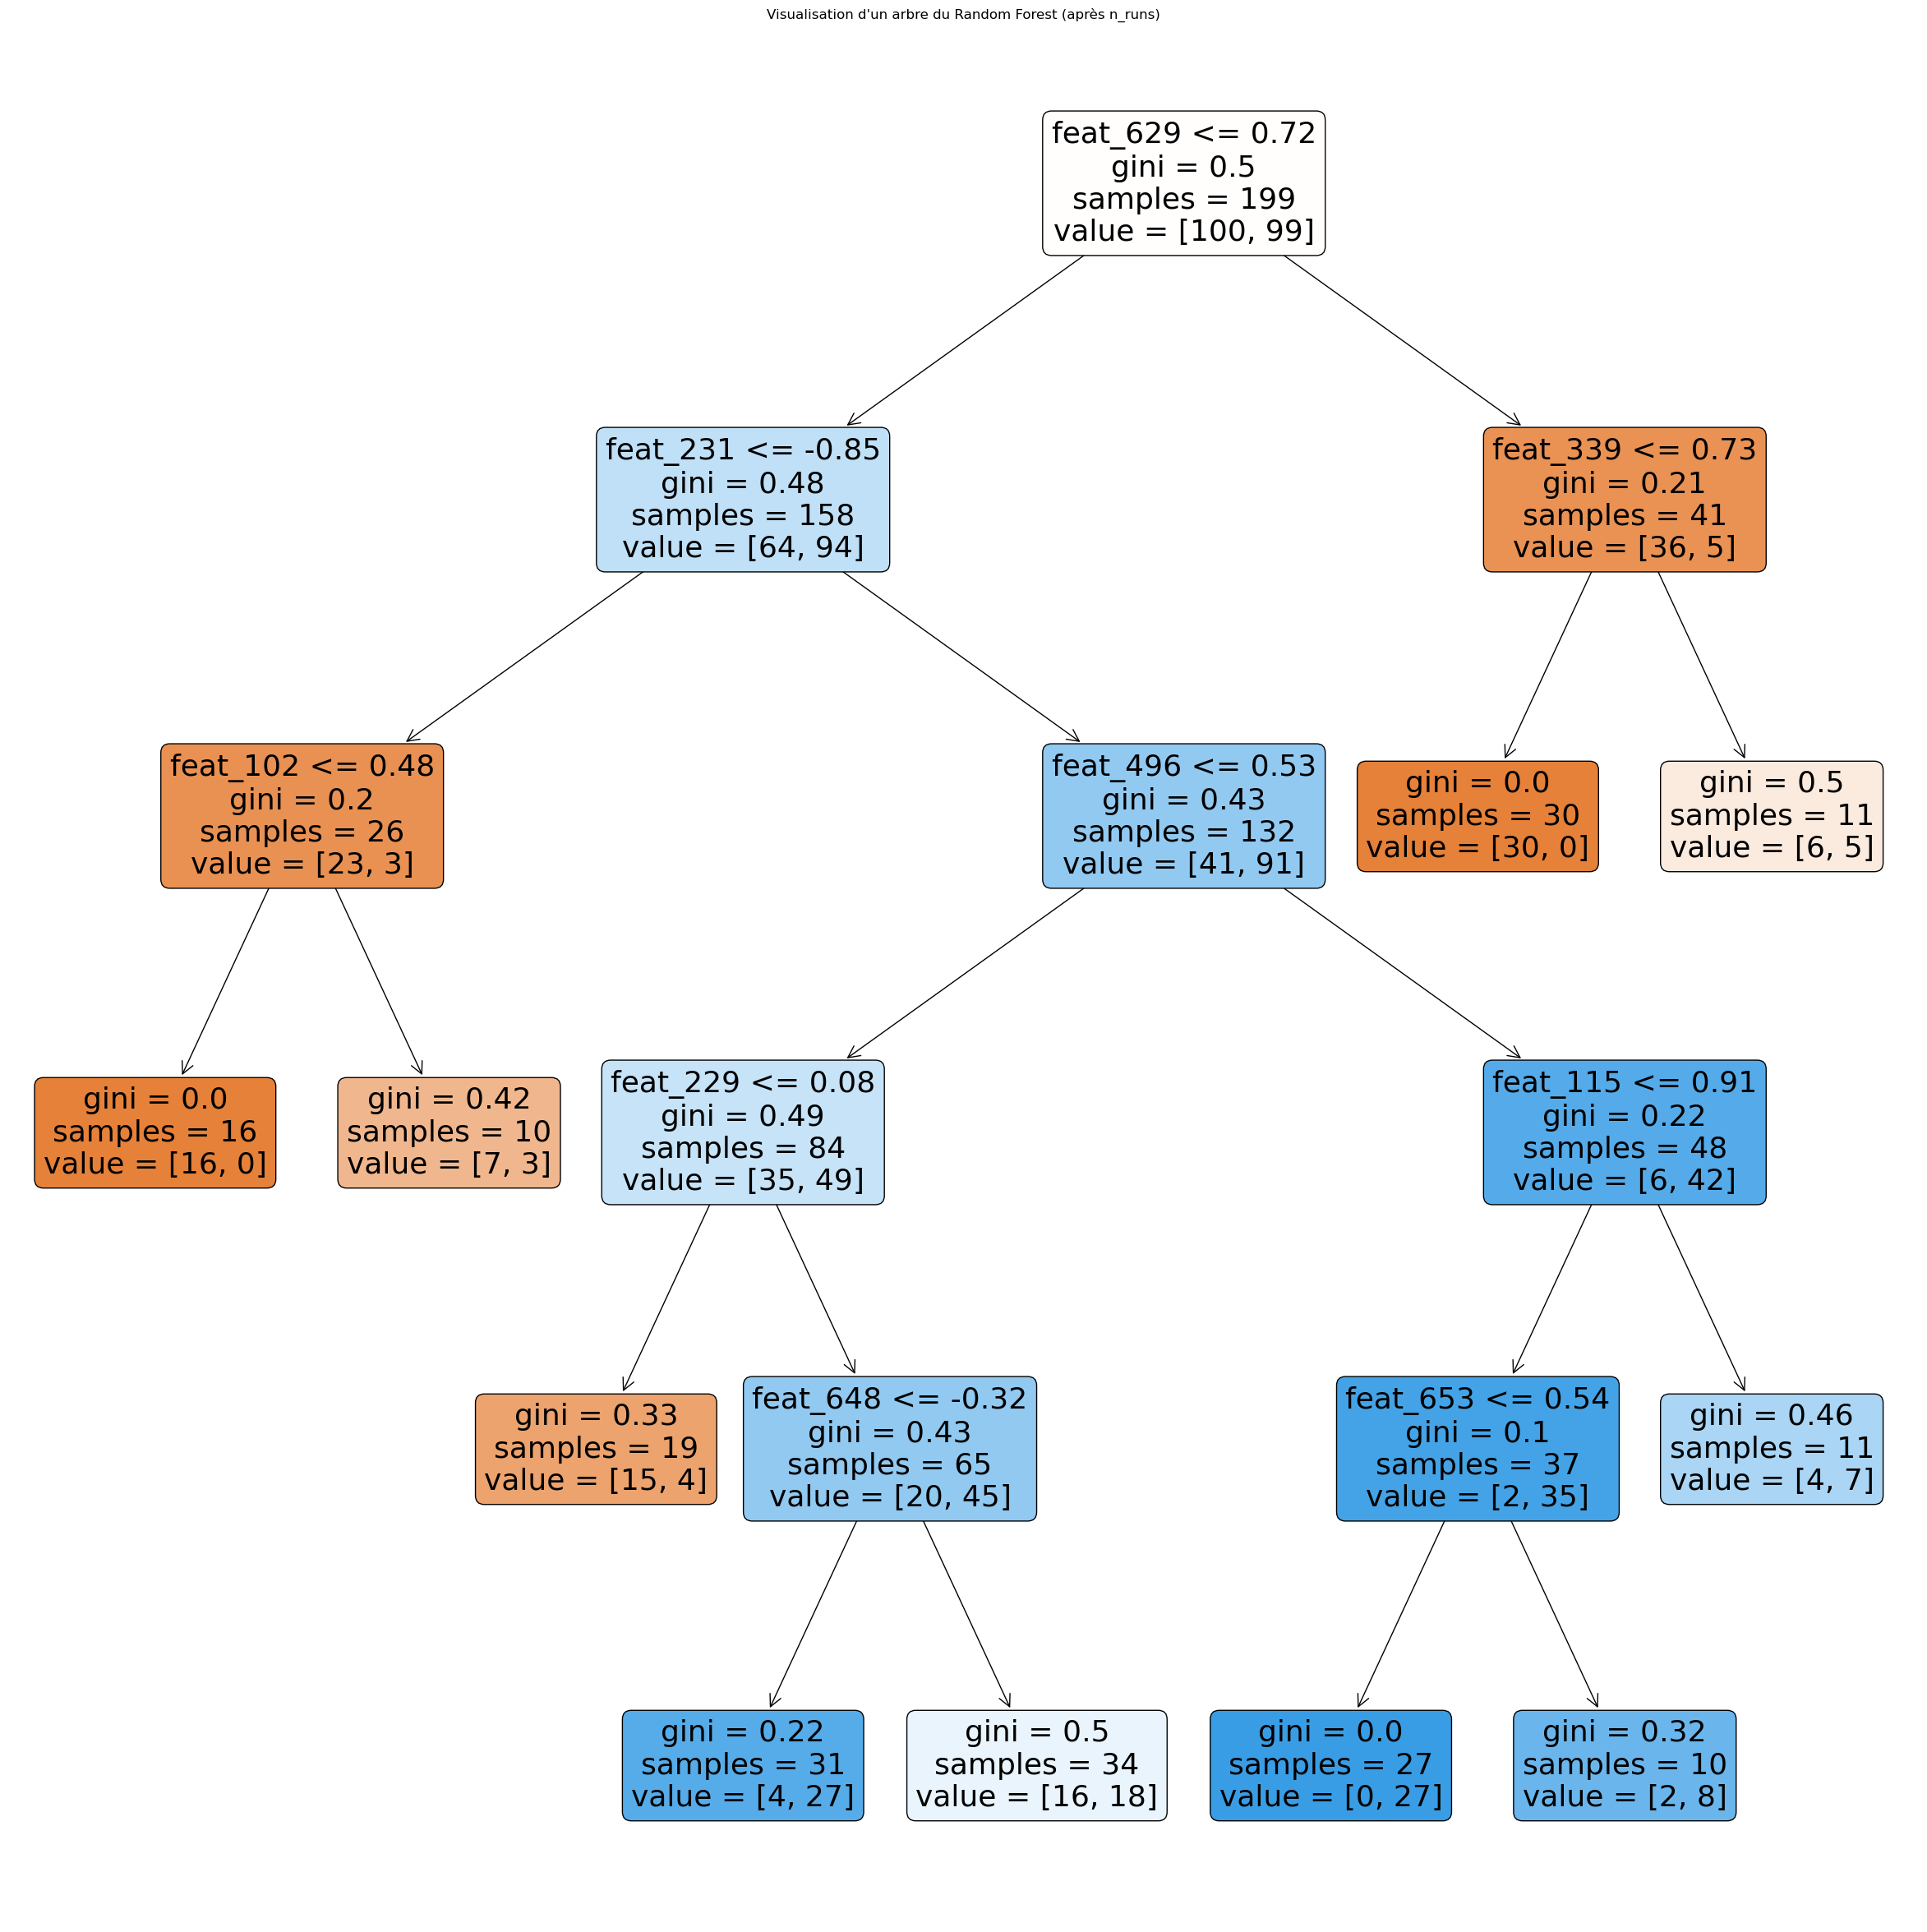

In [18]:
# Sélection de la fenêtre
freq_start = 1.0
freq_end = 8.0
num_points = 1001
frequencies = np.linspace(freq_start, freq_end, num_points)

freq_min = 1.56
freq_max = 1.625
freq_indices = np.where((frequencies >= freq_min) & (frequencies <= freq_max))[0]
window_size = len(freq_indices)

train_data_fd = np.imag(train_data[:, freq_indices, :])
test_data_fd = np.imag(test_data[:, freq_indices, :])

train_data = normalize_samples(train_data_fd)
test_data = normalize_samples(test_data_fd)

train_data = np.reshape(train_data, [np.size(train_data, axis=0), window_size * 72])
test_data = np.reshape(test_data, [np.size(test_data, axis=0), window_size * 72])

# Fusion des données
data_all = np.concatenate((train_data, test_data), axis=0)
labels_all = np.concatenate((train_labels, test_labels), axis=0)

###############################################################################
# Fonctions d'évaluation 
def get_best_acc(labels, preds, fixed_threshold=-1.0):
    labels = np.array(labels)
    preds = np.array(preds)

    best_acc = -1
    best_sens = -1
    best_spec = -1
    best_threshold = 0

    if fixed_threshold == -1.0:
        possible_thresholds = np.linspace(0, 1, 1000)
    else:
        assert 0 <= fixed_threshold <= 1, "Error: fixed_threshold must be between 0 and 1"
        possible_thresholds = [fixed_threshold]

    for thresh in possible_thresholds:
        tp = np.sum(np.logical_and(labels == 1, preds > thresh))
        tn = np.sum(np.logical_and(labels == 0, preds < thresh))
        fn = np.sum(np.logical_and(labels == 1, preds < thresh))
        fp = np.sum(np.logical_and(labels == 0, preds > thresh))

        acc = (tp + tn) / (tp + tn + fp + fn)
        sens = tp / (tp + fn) if (tp + fn) != 0 else 0
        spec = tn / (tn + fp) if (tn + fp) != 0 else 0

        if acc > best_acc:
            best_acc = acc
            best_threshold = thresh
            best_sens = sens
            best_spec = spec

    logger.info('\tbest threshold:\t%.3f' % best_threshold)
    return best_threshold, best_acc, best_sens, best_spec

def report_results(model, data, labels, return_threshold=False, threshold=-1.0):
    pred_probs = model.predict_proba(data)[:, 1]
    threshold, acc, sens, spec = get_best_acc(labels, pred_probs, fixed_threshold=threshold)
    roc_score = roc_auc_score(labels, pred_probs)

    logger.info('\t\tAcc:\t%.3f' % acc)
    logger.info('\t\tROC:\t%.3f' % roc_score)
    logger.info('\t\tSens:\t%.3f' % sens)
    logger.info('\t\tSpec:\t%.3f' % spec)

    if return_threshold:
        return threshold, acc, roc_score, sens, spec
    else:
        return acc, roc_score, sens, spec

###############################################################################
param_grid = {
    'n_estimators':      [100, 200],
    'max_depth':         [3, 5],
    'min_samples_leaf':  [10, 30],
    'min_samples_split': [5, 10],
    'max_features':      ['sqrt'],
    'bootstrap':         [True, False]
}

###############################################################################
if __name__ == '__main__':

    logger.info('\tBEGINNING...')
    logger.info('\tMax Iter: %d\tLearn Rate: %.3f' % (__MAX_ITER, __LEARN_RATE))

    n_runs = 100  

    all_runs_results = []
    best_params_list = []

    for run_idx in range(n_runs):
        # Split train/test (aléatoire à chaque run)
        X_train, X_test, y_train, y_test = train_test_split(
            data_all, labels_all, test_size=0.2, stratify=labels_all, random_state=42 + run_idx
        )

 
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        logger.info('--- RUN %d / %d ---' % (run_idx + 1, n_runs))

        # Grid Search sur ce split
        logger.info('\tLancement du GridSearchCV sur ce RUN...')
        rf = RandomForestClassifier(random_state=42)
        grid_search = GridSearchCV(
            estimator=rf,
            param_grid=param_grid,
            cv=3,               
            scoring='accuracy',
            n_jobs=-1
        )
        grid_search.fit(X_train_scaled, y_train)

        # Meilleur modèle pour cette RUN
        best_model = grid_search.best_estimator_
        best_params_run = grid_search.best_params_
        best_params_list.append(best_params_run)

        logger.info(f"\tMeilleurs paramètres RUN {run_idx+1}: {best_params_run}")

        # Évaluation train
        logger.info('\tTrain Data:')
        threshold, acc_train, roc_train, sens_train, spec_train = report_results(
            best_model, X_train_scaled, y_train, return_threshold=True, threshold=-1.0
        )

        # Évaluation test 
        logger.info('\tTest Data:')
        acc_test, roc_test, sens_test, spec_test = report_results(
            best_model, X_test_scaled, y_test, threshold=threshold
        )

        # Stocker les résultats de cette RUN
        all_runs_results.append({
            'run': run_idx+1,
            'params': best_params_run,
            'train_acc': acc_train,
            'train_roc': roc_train,
            'train_sens': sens_train,
            'train_spec': spec_train,
            'test_acc': acc_test,
            'test_roc': roc_test,
            'test_sens': sens_test,
            'test_spec': spec_test
        })

    # --- Fin de la boucle sur les runs ---

    # Affichage des résultats de toutes les runs
    logger.info("\n--- RÉSUMÉ DES RÉSULTATS SUR TOUS LES RUNS ---")
    for res in all_runs_results:
        logger.info(
            f"RUN {res['run']}: "
            f"train_acc={res['train_acc']:.3f}, test_acc={res['test_acc']:.3f}, "
            f"params={res['params']}"
        )

    # On peut voir quels paramètres sont les plus fréquents
    logger.info("\n--- PARAMÈTRES LES PLUS FRÉQUENTS ---")
    final_best_params = {}
    for key in param_grid.keys():
        vals = [bp[key] for bp in best_params_list]
        most_common = Counter(vals).most_common(1)[0][0]
        final_best_params[key] = most_common

    logger.info(f"Hyperparamètres les plus fréquents sur {n_runs} runs: {final_best_params}")

    logger.info("\n--- Entraînement final avec les hyperparamètres majoritaires ---")
    final_rf = RandomForestClassifier(**final_best_params, random_state=42)
    final_rf.fit(X_train_scaled, y_train)

    # Affichage d'un arbre pour voir la complexité
    selected_tree = final_rf.estimators_[0]
    selected_columns = [f"feat_{i}" for i in range(X_train.shape[1])]

    fig = plt.figure(figsize=(30, 30))
    _ = tree.plot_tree(
        selected_tree,
        feature_names=selected_columns,
        filled=True,
        rounded=True,
        precision=2
    )
    plt.title("Visualisation d'un arbre du Random Forest (après n_runs)")
    plt.show()


	best threshold:	0.522
		Acc:	0.720
		ROC:	0.739
		Sens:	0.680
		Spec:	0.760
	best threshold:	0.336
		Acc:	0.680
		ROC:	0.707
		Sens:	0.960
		Spec:	0.400
	best threshold:	0.458
		Acc:	0.820
		ROC:	0.848
		Sens:	0.960
		Spec:	0.680
	best threshold:	0.573
		Acc:	0.800
		ROC:	0.859
		Sens:	0.720
		Spec:	0.880
	best threshold:	0.434
		Acc:	0.760
		ROC:	0.774
		Sens:	0.880
		Spec:	0.640
Fenêtre 0-10 : Accuracy moyenne = 0.785
	best threshold:	0.296
		Acc:	0.720
		ROC:	0.786
		Sens:	0.960
		Spec:	0.480
	best threshold:	0.370
		Acc:	0.820
		ROC:	0.834
		Sens:	0.960
		Spec:	0.680
	best threshold:	0.424
		Acc:	0.820
		ROC:	0.818
		Sens:	0.880
		Spec:	0.760
	best threshold:	0.429
		Acc:	0.880
		ROC:	0.911
		Sens:	0.960
		Spec:	0.800
	best threshold:	0.497
		Acc:	0.740
		ROC:	0.691
		Sens:	0.800
		Spec:	0.680
Fenêtre 10-20 : Accuracy moyenne = 0.808
	best threshold:	0.496
		Acc:	0.720
		ROC:	0.702
		Sens:	0.760
		Spec:	0.680
	best threshold:	0.376
		Acc:	0.680
		ROC:	0.686
		Sens:	0.840
		Spec:	0

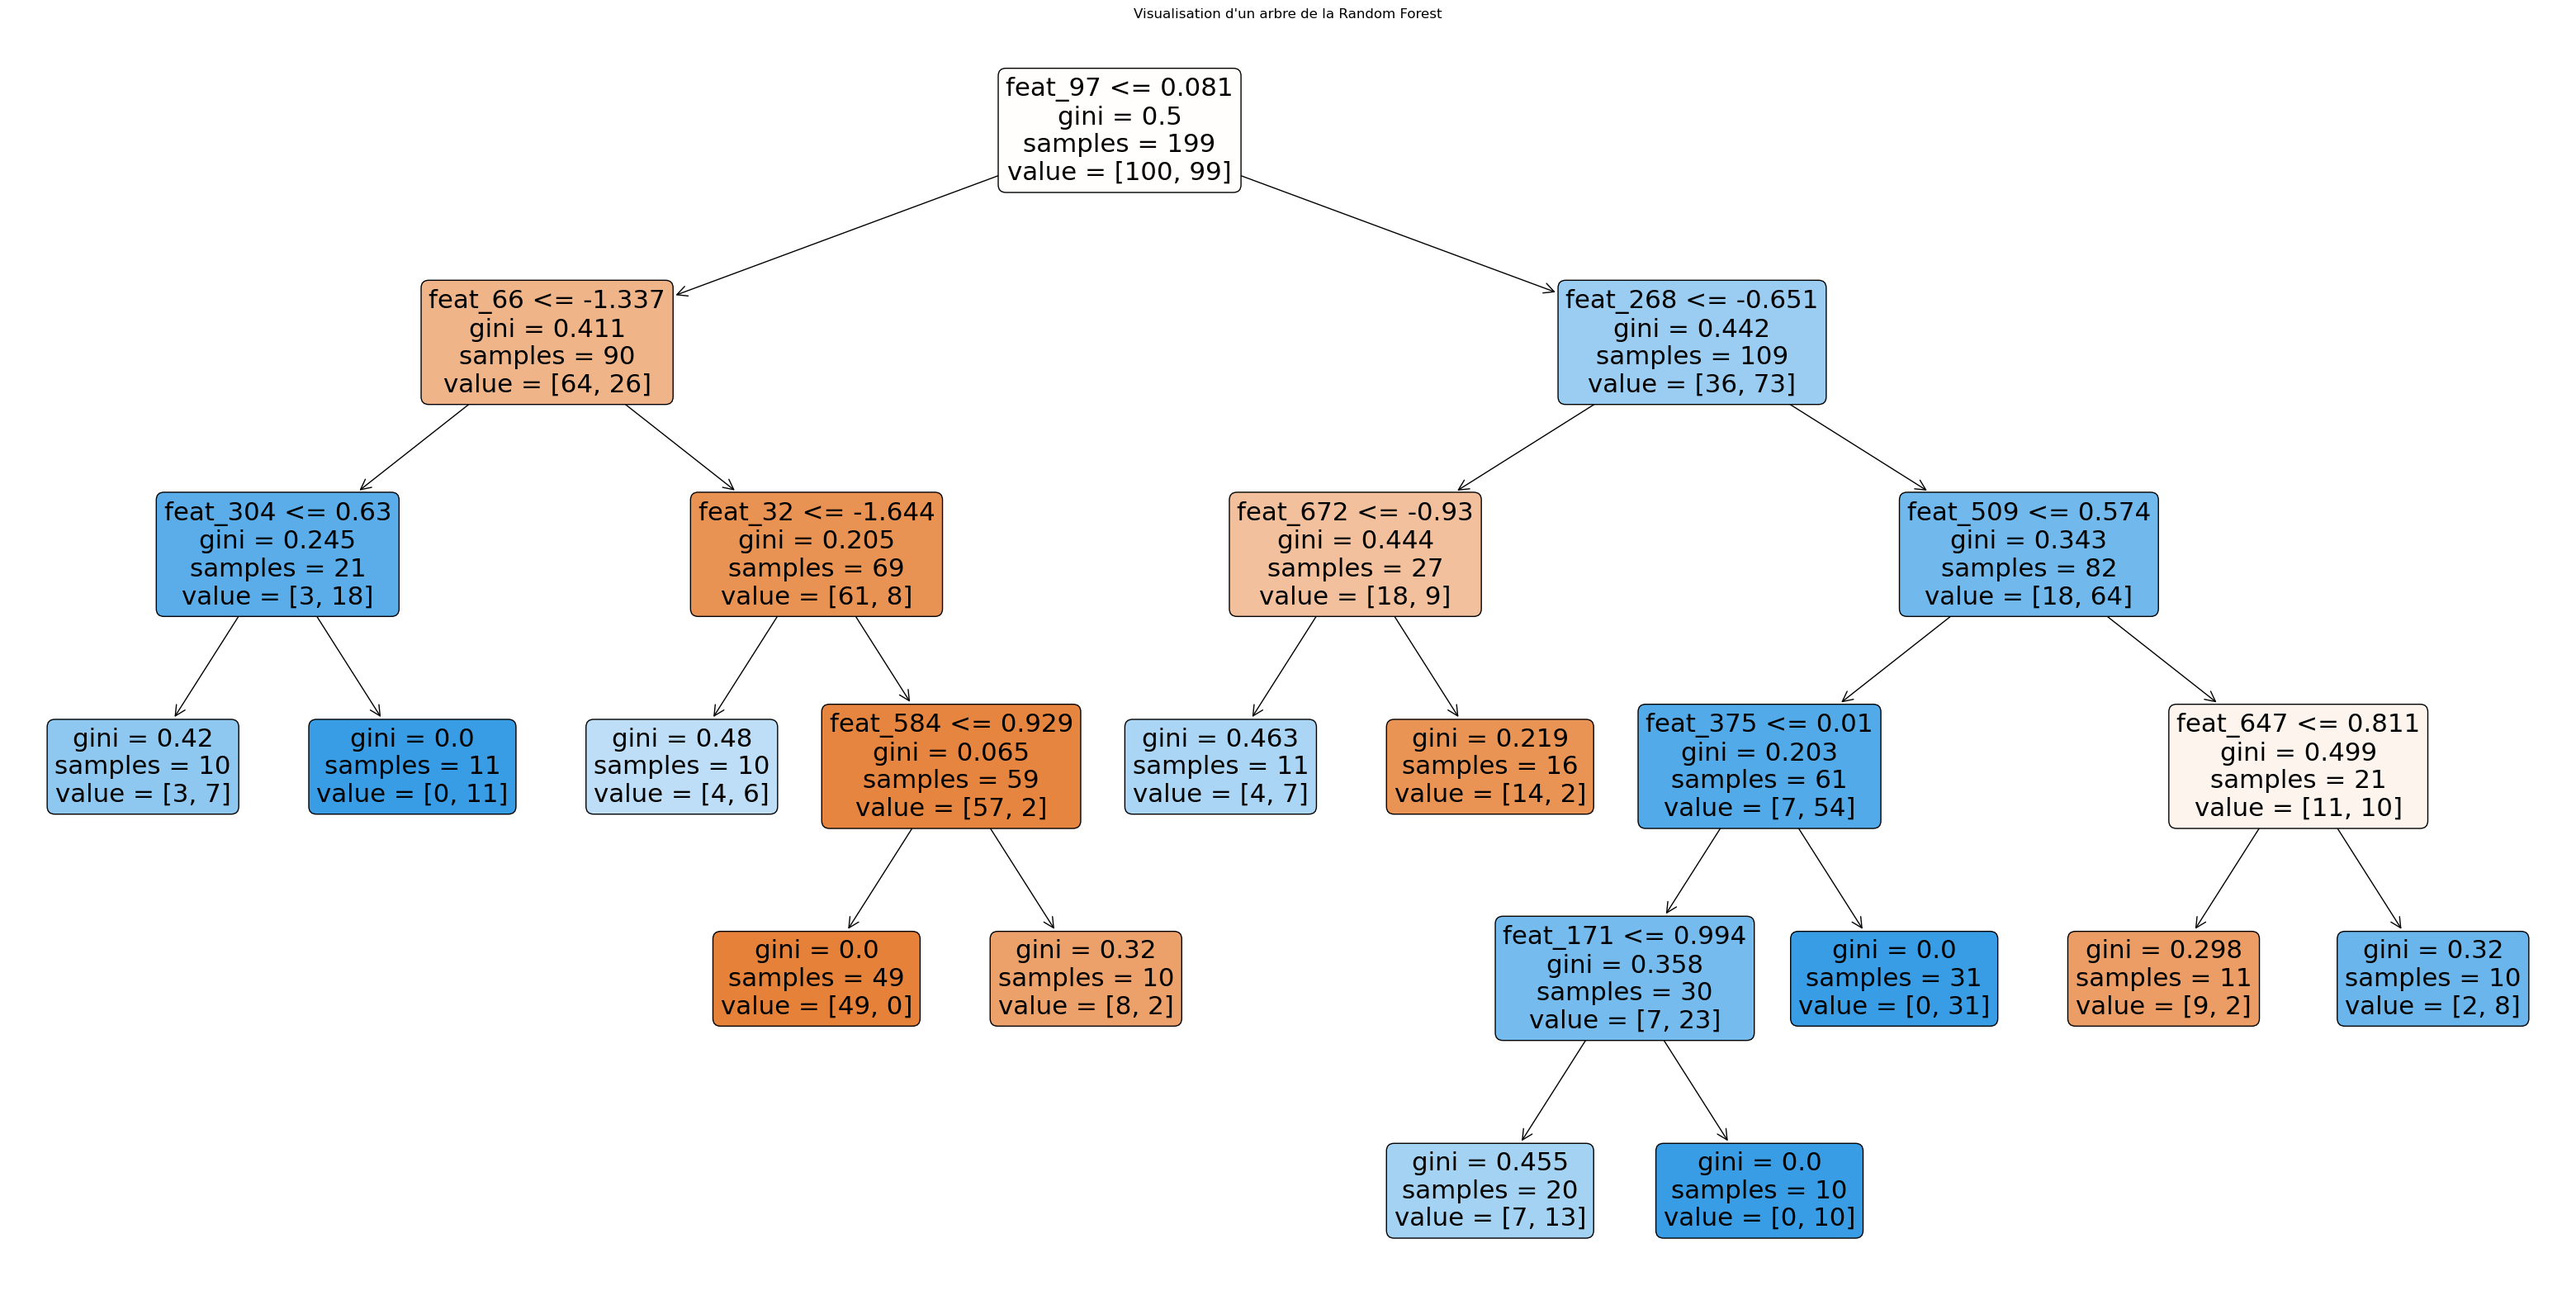

In [27]:
def get_best_acc(labels, preds, fixed_threshold=-1.0):
    labels = np.array(labels)
    preds = np.array(preds)

    best_acc = -1
    best_sens = -1
    best_spec = -1
    best_threshold = 0

    if fixed_threshold == -1.0:
        possible_thresholds = np.linspace(0, 1, 1000)
    else:
        assert 0 <= fixed_threshold <= 1, "Error: fixed_threshold must be between 0 and 1"
        possible_thresholds = [fixed_threshold]

    for thresh in possible_thresholds:
        tp = np.sum(np.logical_and(labels == 1, preds > thresh))
        tn = np.sum(np.logical_and(labels == 0, preds < thresh))
        fn = np.sum(np.logical_and(labels == 1, preds < thresh))
        fp = np.sum(np.logical_and(labels == 0, preds > thresh))

        acc = (tp + tn) / (tp + tn + fp + fn)
        sens = tp / (tp + fn) if (tp + fn) != 0 else 0
        spec = tn / (tn + fp) if (tn + fp) != 0 else 0

        if acc > best_acc:
            best_acc = acc
            best_threshold = thresh
            best_sens = sens
            best_spec = spec

    print(f"\tbest threshold:\t{best_threshold:.3f}")
    return best_threshold, best_acc, best_sens, best_spec

def report_results(model, data, labels, return_threshold=False, threshold=-1.0):
    pred_probs = model.predict_proba(data)[:, 1]
    threshold, acc, sens, spec = get_best_acc(labels, pred_probs, fixed_threshold=threshold)
    roc_score = roc_auc_score(labels, pred_probs)

    print(f"\t\tAcc:\t{acc:.3f}")
    print(f"\t\tROC:\t{roc_score:.3f}")
    print(f"\t\tSens:\t{sens:.3f}")
    print(f"\t\tSpec:\t{spec:.3f}")

    if return_threshold:
        return threshold, acc, roc_score, sens, spec
    else:
        return acc, roc_score, sens, spec

def normalize_samples(data):
    """
    Normalise chaque échantillon (3D) pour que son maximum vaille 1.
    data.shape = (N, freq, positions)
    """
    assert len(data.shape) == 3, "Data must be 3D"
    N = data.shape[0]
    norm_data = np.ones_like(data)
    for i in range(N):
        maxi = np.max(np.abs(data[i]))
        if maxi == 0:
            norm_data[i] = data[i]
        else:
            norm_data[i] = data[i] / maxi
    return norm_data

###############################################################################
# Paramètres globaux
__LEARN_RATE = 1
__MAX_ITER = 1000000000

###############################################################################
# 1) Recherche de la meilleure fenêtre de fréquences

window_size = 10    # Nombre de fréquences par fenêtre
num_windows = 100   # On va parcourir 100 fenêtres
n_repeats = 5       # Nombre de répétitions pour chaque fenêtre

window_starts = np.arange(0, 1000 - window_size + 1, step=window_size)

best_avg_acc = 0
best_window = None

for start_idx in window_starts:
    end_idx = start_idx + window_size
    freq_indices = np.arange(start_idx, end_idx)  # 10 fréquences consécutives

    acc_list = []
    for rep in range(n_repeats):
        # Extraire la partie imaginaire sur freq_indices
        train_data_fd = np.imag(train_data[:, freq_indices, :])
        test_data_fd = np.imag(test_data[:, freq_indices, :])

        # Normaliser
        train_data_norm = normalize_samples(train_data_fd)
        test_data_norm = normalize_samples(test_data_fd)

        # Aplatir
        train_data_flat = np.reshape(train_data_norm, [train_data_norm.shape[0], window_size * 72])
        test_data_flat = np.reshape(test_data_norm, [test_data_norm.shape[0], window_size * 72])

        # Fusion
        data_all = np.concatenate((train_data_flat, test_data_flat), axis=0)
        labels_all = np.concatenate((train_labels, test_labels), axis=0)

        # Split train/test
        X_train, X_test, y_train, y_test = train_test_split(
            data_all, labels_all, test_size=0.2, stratify=labels_all, random_state=42 + rep
        )

        # Mise à l'échelle
        scaler = RobustScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled  = scaler.transform(X_test)

        # Petit RandomForest basique pour tester la fenêtre
        # (on pourrait utiliser un SVC ou un autre classifieur)
        rf_temp = RandomForestClassifier(n_estimators=30, max_depth=3, random_state=42+rep)
        rf_temp.fit(X_train_scaled, y_train)

        # On récupère l'accuracy pour comparer les fenêtres
        _, acc, _, _ = report_results(rf_temp, X_test_scaled, y_test)
        acc_list.append(acc)

    avg_acc = np.mean(acc_list)
    print(f"Fenêtre {start_idx}-{end_idx} : Accuracy moyenne = {avg_acc:.3f}")

    if avg_acc > best_avg_acc:
        best_avg_acc = avg_acc
        best_window = (start_idx, end_idx)

print(f"\nMeilleure fenêtre trouvée : {best_window} avec une Accuracy moyenne de {best_avg_acc:.3f}")

###############################################################################
# 2) Utiliser la meilleure fenêtre trouvée pour l'entraînement final

start_idx, end_idx = best_window
freq_indices = np.arange(start_idx, end_idx)
final_window_size = len(freq_indices)

# Extraire la partie imaginaire sur la meilleure fenêtre
train_data_fd = np.imag(train_data[:, freq_indices, :])
test_data_fd = np.imag(test_data[:, freq_indices, :])

# Normaliser
train_data_norm = normalize_samples(train_data_fd)
test_data_norm = normalize_samples(test_data_fd)

# Aplatir
train_data_flat = np.reshape(train_data_norm, [train_data_norm.shape[0], final_window_size * 72])
test_data_flat = np.reshape(test_data_norm, [test_data_norm.shape[0], final_window_size * 72])

# Fusion
data_all = np.concatenate((train_data_flat, test_data_flat), axis=0)
labels_all = np.concatenate((train_labels, test_labels), axis=0)

# Paramètres finaux pour RandomForest
best_params = {
    'n_estimators': 100,
    'max_depth': 5,
    'bootstrap': False,
    'max_features': 'sqrt',
    'min_samples_leaf': 10,
    'min_samples_split': 5
}

n_runs = 100
train_acc_list, train_roc_list = [], []
test_acc_list,  test_roc_list  = [], []
train_sens_list, train_spec_list = [], []
test_sens_list,  test_spec_list  = [], []

for run_idx in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(
        data_all, labels_all, test_size=0.2, stratify=labels_all, random_state=42 + run_idx
    )

    # Mise à l'échelle standard
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    # Entraîner le RandomForest avec best_params
    rf = RandomForestClassifier(**best_params, random_state=42+run_idx)
    rf.fit(X_train_scaled, y_train)

    print(f"\n--- RUN {run_idx+1}/{n_runs} ---")
    print(f"Test Set NumPos: {np.sum(y_test)}  NumNeg: {np.sum(1 - y_test)}")

    # Évaluer sur train
    print("\tTrain Data:")
    threshold, acc_tr, roc_tr, sens_tr, spec_tr = report_results(rf, X_train_scaled, y_train,
                                                                 return_threshold=True,
                                                                 threshold=-1.0)
    train_acc_list.append(acc_tr)
    train_roc_list.append(roc_tr)
    train_sens_list.append(sens_tr)
    train_spec_list.append(spec_tr)

    # Évaluer sur test avec le même threshold
    print("\tTest Data:")
    acc_te, roc_te, sens_te, spec_te = report_results(rf, X_test_scaled, y_test, threshold=threshold)
    test_acc_list.append(acc_te)
    test_roc_list.append(roc_te)
    test_sens_list.append(sens_te)
    test_spec_list.append(spec_te)

# Fin de la boucle n_runs

# Convertir en numpy array
train_acc_list = np.array(train_acc_list)
train_roc_list = np.array(train_roc_list)
test_acc_list  = np.array(test_acc_list)
test_roc_list  = np.array(test_roc_list)
train_sens_list = np.array(train_sens_list)
train_spec_list = np.array(train_spec_list)
test_sens_list  = np.array(test_sens_list)
test_spec_list  = np.array(test_spec_list)

# Affichage final des performances moyennes
print("\n--- RÉSULTATS FINAUX SUR TOUTES LES RUNS ---")
print(f"Train Accuracy: {train_acc_list.mean():.3f} +/- {train_acc_list.std():.3f}")
print(f"Train ROC AUC:  {train_roc_list.mean():.3f} +/- {train_roc_list.std():.3f}")
print(f"Train Sens.:    {train_sens_list.mean():.3f} +/- {train_sens_list.std():.3f}")
print(f"Train Spec.:    {train_spec_list.mean():.3f} +/- {train_spec_list.std():.3f}")

print(f"Test  Accuracy: {test_acc_list.mean():.3f} +/- {test_acc_list.std():.3f}")
print(f"Test  ROC AUC:  {test_roc_list.mean():.3f} +/- {test_roc_list.std():.3f}")
print(f"Test  Sens.:    {test_sens_list.mean():.3f} +/- {test_sens_list.std():.3f}")
print(f"Test  Spec.:    {test_spec_list.mean():.3f} +/- {test_spec_list.std():.3f}")

# Visualisation d'un arbre dans la forêt
selected_tree = rf.estimators_[0]
feature_names = [f"feat_{i}" for i in range(final_window_size * 72)]

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(40, 20))
_ = tree.plot_tree(selected_tree, feature_names=feature_names, filled=True, rounded=True)
plt.title("Visualisation d'un arbre de la Random Forest")
plt.show()

In [29]:

freq_start = 1.0  # GHz (fréquence minimale)
freq_end = 8.0    # GHz (fréquence maximale)
num_points = 1001  


frequencies = np.linspace(freq_start, freq_end, num_points)


freq_min = 1.56  # GHz
freq_max = 1.625  # GHz 

#indices correspondant à cette fenêtre
freq_indices = np.where((frequencies >= freq_min) & (frequencies <= freq_max))[0]
print(freq_indices)


[80 81 82 83 84 85 86 87 88 89]
